# Text Mining, K-means e Twitter
## Motivação:
- Conta de desenvolvedor Twitter
- Carregando e visualizando os tweets
- O trabalho de Mineração de Textos - Text Mining
- Clustering: Dendograma e K-means

In [1]:
library(rtweet)
library(wordcloud)
library(tm)
library(RColorBrewer)
library(cluster)
library(fpc)

Warning message:
"package 'rtweet' was built under R version 3.6.3"
Warning message:
"package 'wordcloud' was built under R version 3.6.3"
Loading required package: RColorBrewer

Warning message:
"package 'tm' was built under R version 3.6.3"
Loading required package: NLP

Warning message:
"package 'NLP' was built under R version 3.6.3"
Warning message:
"package 'cluster' was built under R version 3.6.3"
Warning message:
"package 'fpc' was built under R version 3.6.3"


In [8]:
# store api keys
api_key <- "M9w8f9hPeOe993nRdIBCgdAV2"
api_secret_key <- "5Ib0OGlR2NBIAsdqeDWKNA1jq69dAWDavmeVhl0E0GI98r8WQp"

access_token <- "1782595764-lqWazlXsdXyUpudQbEkhHvFka6b3HwcQfD0HnYk"
access_token_secret <- "Svmgx10YX1yOzkSk5ECPiFl6DMbP4NaQT4UpFreYhYHro"

## authenticate via web browser
token <- create_token(
    app = "OMNP_Anluhen",
    consumer_key = api_key,
    consumer_secret = api_secret_key,
    access_token = access_token,
    access_secret = access_token_secret)

In [9]:
get_token()

<Token>
<oauth_endpoint>
 request:   https://api.twitter.com/oauth/request_token
 authorize: https://api.twitter.com/oauth/authenticate
 access:    https://api.twitter.com/oauth/access_token
<oauth_app> OMNP_Anluhen
  key:    M9w8f9hPeOe993nRdIBCgdAV2
  secret: <hidden>
<credentials> oauth_token, oauth_token_secret
---

In [10]:
# Carregando os tweets existentes
setwd("Dados")
load("tweets_5.RData")

ERROR: Error in setwd("Dados"): não é possível mudar o diretório de trabalho


In [11]:
# Puxando os Tweets diretamente do Twitter
# Limite de 18.000 tweets a cada 15 minutos

tweets <- search_tweets(
    "#stockmarket", n = 12000, include_rts = FALSE, lang = "en")

In [12]:
dim(tweets)

[1] 11961    90

In [13]:
str(tweets)

tibble[,90] [11,961 x 90] (S3: tbl_df/tbl/data.frame)
 $ user_id                : chr [1:11961] "374729426" "374729426" "374729426" "374729426" ...
 $ status_id              : chr [1:11961] "1505156845534519298" "1505156654374920192" "1504152983176572928" "1504743513736376321" ...
 $ created_at             : POSIXct[1:11961], format: "2022-03-19 12:18:51" "2022-03-19 12:18:05" ...
 $ screen_name            : chr [1:11961] "Tickeron" "Tickeron" "Tickeron" "Tickeron" ...
 $ text                   : chr [1:11961] "$SABR in Uptrend: RSI indicator exits oversold zone. View odds for this and other indicators: https://t.co/wWh1"| __truncated__ "$HEPA enters a Downtrend as Momentum Indicator dropped below the 0 level on March 14, 2022. View odds for this "| __truncated__ "If you’re trading this week, Read This! $HEXO entered a Downtrend because Momentum Indicator dropped below the "| __truncated__ "$RKT in -7.16% Downtrend, falling for three consecutive days on March 15, 2022. View odds for th

In [14]:
# Salvando a busca

save(tweets, file = "tweets_5.RData")

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:NLP':

    annotate




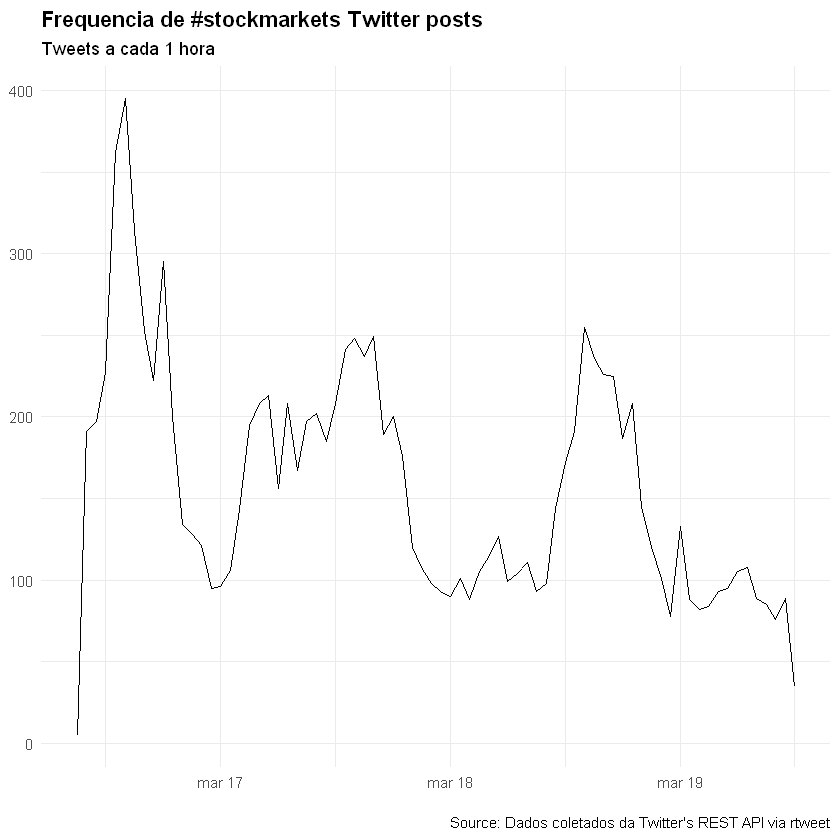

In [15]:
# Rápida visualização - exemplo tirado da própria documentação do rtweet

tweets %>% 
    ts_plot("1 hour") +
    ggplot2::theme_minimal() +
    ggplot2::theme(plot.title = ggplot2::element_text(face = "bold")) +
    ggplot2::labs(
        x = NULL,  y = NULL,
    title = "Frequencia de #stockmarkets Twitter posts",
    subtitle = "Tweets a cada 1 hora",
    caption = "\nSource: Dados coletados da Twitter's REST API via rtweet"
    );

In [16]:
tweets_text <- tweets$text

In [17]:
# Criando e impando o corpus

tweets_text_corpus <- VCorpus(VectorSource(tweets_text))
tweets_text_corpus <- tm_map(tweets_text_corpus,
                            content_transformer(function(x) iconv(x, to = 'UTF-8', sub = 'byte')))
tweets_text_corpus <- tm_map(tweets_text_corpus, content_transformer(tolower))
tweets_text_corpus <- tm_map(tweets_text_corpus, removePunctuation)
tweets_text_corpus <- tm_map(tweets_text_corpus, removeWords, stopwords("english"))

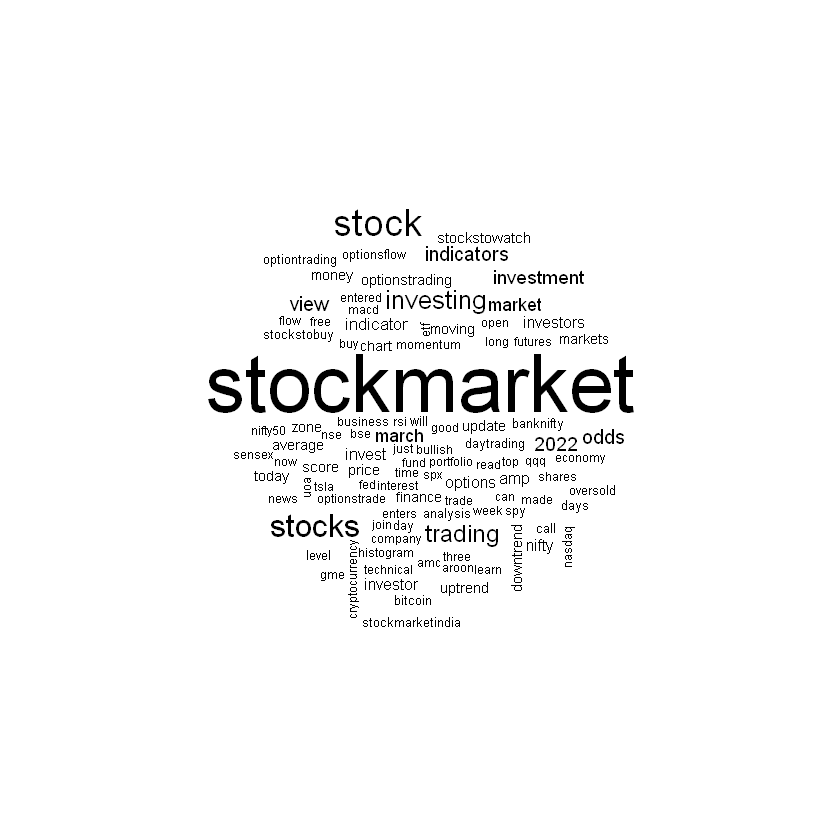

In [18]:
# Primeira visualização 

wordcloud(tweets_text_corpus, min.freq = 2, max.words = 100)

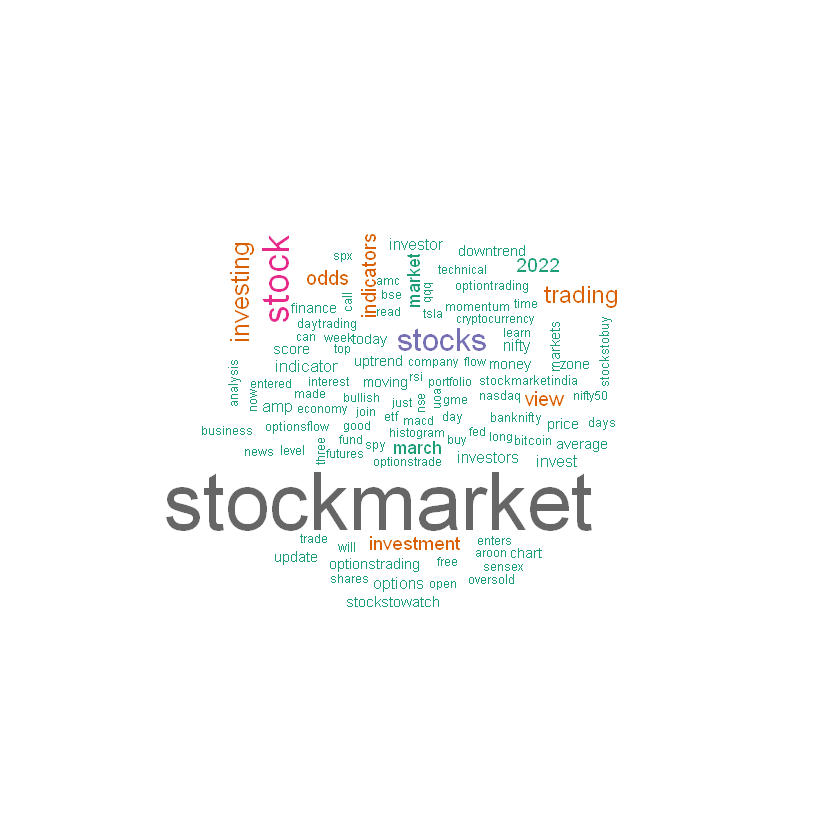

In [19]:
formatacao <- brewer.pal(8, "Dark2")

wordcloud(tweets_text_corpus, min.freq = 2, max.words = 100, random.order = T, color = formatacao)

In [20]:
# Limpeza do texto com o Document Term Matrix

tweets_dtm <- DocumentTermMatrix(tweets_text_corpus)
tweets_dtm

<<DocumentTermMatrix (documents: 11961, terms: 36787)>>
Non-/sparse entries: 207748/439801559
Sparsity           : 100%
Maximal term length: 160
Weighting          : term frequency (tf)

In [21]:
tweets_frequencia <- colSums(as.matrix(tweets_dtm))

length(tweets_frequencia)

tail(tweets_frequencia, 10)

[1] 36787

zsezw        zto        zts zuckerberg       zulu        zwf  zyduslife 
         3          2          1          2          1          1          1 
     zynga    zzzâ\200\231s     zzzune 
         3          1          1

In [22]:
# Reovendo termos esparços

tweets_dtms <- removeSparseTerms(tweets_dtm, 0.98)
tweets_dtms 

<<DocumentTermMatrix (documents: 11961, terms: 115)>>
Non-/sparse entries: 80828/1294687
Sparsity           : 94%
Maximal term length: 16
Weighting          : term frequency (tf)

In [23]:
tweets_frequencia <- colSums(as.matrix(tweets_dtms))
length(tweets_frequencia)

[1] 115

In [24]:
tweets_frequencia <- sort(colSums(as.matrix(tweets_dtms)), decreasing = T)
tweets_frequencia

stockmarket            stock           stocks        investing 
           12028             4879             3844             2666 
         trading             view       indicators             odds 
            2451             1742             1693             1674 
      investment             2022           market            march 
            1618             1484             1381             1311 
       indicator           invest            nifty        investors 
            1225             1129             1098              995 
         options         investor              amp          uptrend 
             967              958              956              922 
       downtrend    stockstowatch           update   optionstrading 
             905              901              899              857 
           price            score          average           moving 
             839              813              694              692 
         markets          finance            chart             will 
             691              685              665              665 
            zone            money            today          bitcoin 
             663              628              612              601 
             spy       daytrading             days      stockstobuy 
             597              595              576              550 
            news              now         momentum             call 
             508              495              478              472 
          nasdaq         oversold              day stockmarketindia 
             464              464              462              459 
   optiontrading      optionsflow            level         analysis 
             453              452              446              440 
       banknifty              etf              top             flow 
             434              434              413              409 
         nifty50              buy            trade              rsi 
             407              403              403              392 
    optionstrade             good         interest              amc 
             387              371              370              367 
             uoa              nse             macd           shares 
             364              362              358              358 
            fund             open          company        histogram 
             350              348              345              340 
          enters             time         business              can 
             338              338              336              335 
            tsla             read          economy             join 
             335              331              327              325 
  cryptocurrency             free             just           sensex 
             324              324              324              324 
            week            aroon          bullish        technical 
             323              321              321              320 
             spx              qqq            learn          entered 
             319              316              312              308 
            made             long            three              gme 
             306              301              300              294 
       portfolio              bse              fed             gain 
             292              291              290              285 
           50day      consecutive           crypto              may 
             283              270              268              267 
    stockmarkets           turned            exits       stochastic 
             265              264              260              258 
             see              one            think            forex 
             257              253              253              252 
           moved         february          maxpain 
             249              244              240

In [25]:
# Convertendo a matriz de frequência em dataframe para o plot

tweets_plot <- data.frame(word = names(tweets_frequencia), freq = tweets_frequencia)

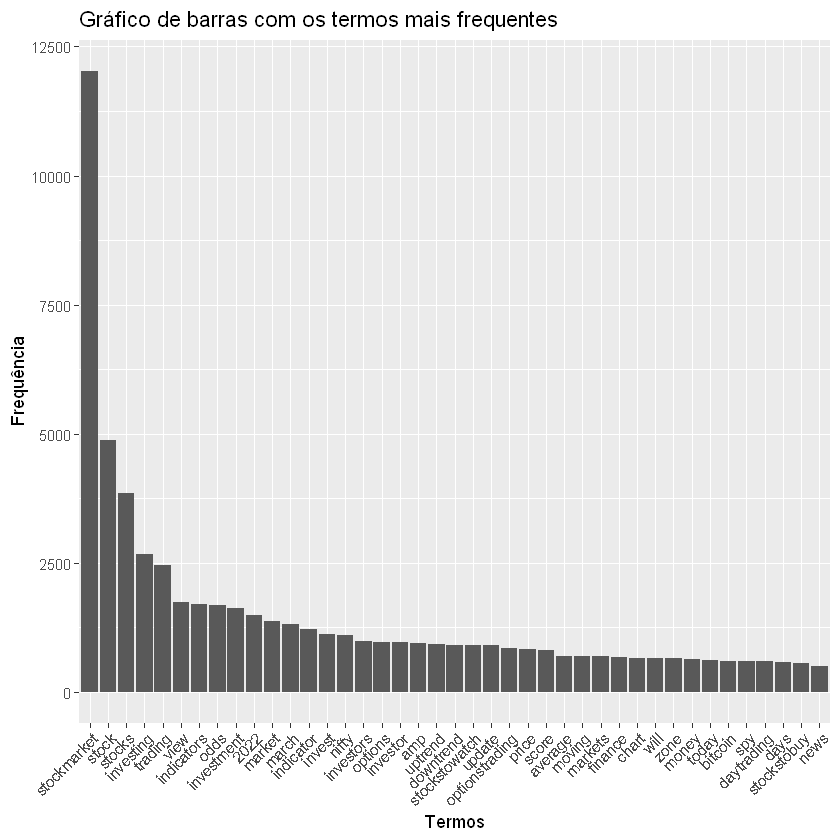

In [26]:
# Criando o gráfico

grafico <- ggplot(subset(tweets_plot, tweets_frequencia > 500), aes(x = reorder(word, -freq), y = freq)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    ggtitle("Gráfico de barras com os termos mais frequentes") +
    labs(y = "Frequência", x = "Termos")

grafico

In [27]:
# Filtragem de contexto

tweets_text_corpus <- tm_map(tweets_text_corpus, removeWords, c("stockmarket", "investing", "trading", "stock", "stocks"))

In [28]:
# Limpando novamento o corpus

tweets_dtms <- removeSparseTerms(DocumentTermMatrix(tweets_text_corpus), 0.98)
tweets_dtms 

tweets_frequencia <- colSums(as.matrix(tweets_dtms))
length(tweets_frequencia)

tweets_frequencia <- sort(colSums(as.matrix(tweets_dtms)), decreasing = T)
tweets_frequencia

<<DocumentTermMatrix (documents: 11961, terms: 110)>>
Non-/sparse entries: 55806/1259904
Sparsity           : 96%
Maximal term length: 16
Weighting          : term frequency (tf)

[1] 110

view       indicators             odds       investment 
            1742             1693             1674             1618 
            2022           market            march        indicator 
            1484             1381             1311             1225 
          invest            nifty        investors          options 
            1129             1098              995              967 
        investor              amp          uptrend        downtrend 
             958              956              922              905 
   stockstowatch           update   optionstrading            price 
             901              899              857              839 
           score          average           moving          markets 
             813              694              692              691 
         finance            chart             will             zone 
             685              665              665              663 
           money            today          bitcoin              spy 
             628              612              601              597 
      daytrading             days      stockstobuy             news 
             595              576              550              508 
             now         momentum             call           nasdaq 
             495              478              472              464 
        oversold              day stockmarketindia    optiontrading 
             464              462              459              453 
     optionsflow            level         analysis        banknifty 
             452              446              440              434 
             etf              top             flow          nifty50 
             434              413              409              407 
             buy            trade              rsi     optionstrade 
             403              403              392              387 
            good         interest              amc              uoa 
             371              370              367              364 
             nse             macd           shares             fund 
             362              358              358              350 
            open          company        histogram           enters 
             348              345              340              338 
            time         business              can             tsla 
             338              336              335              335 
            read          economy             join   cryptocurrency 
             331              327              325              324 
            free             just           sensex             week 
             324              324              324              323 
           aroon          bullish        technical              spx 
             321              321              320              319 
             qqq            learn          entered             made 
             316              312              308              306 
            long            three              gme        portfolio 
             301              300              294              292 
             bse              fed             gain            50day 
             291              290              285              283 
     consecutive           crypto              may     stockmarkets 
             270              268              267              265 
          turned            exits       stochastic              see 
             264              260              258              257 
             one            think            forex            moved 
             253              253              252              249 
        february          maxpain 
             244              240

In [29]:
tweets_plot <- data.frame(word = names(tweets_frequencia), freq = tweets_frequencia)

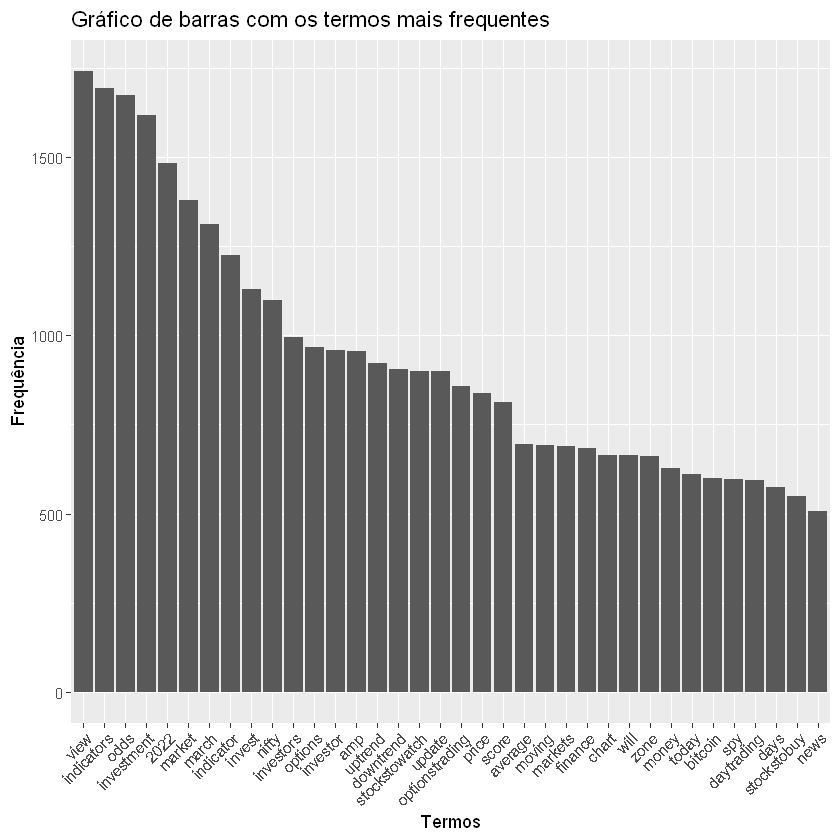

In [30]:
grafico <- ggplot(subset(tweets_plot, tweets_frequencia > 500), aes(x = reorder(word, -freq), y = freq)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    ggtitle("Gráfico de barras com os termos mais frequentes") +
    labs(y = "Frequência", x = "Termos")

grafico

Warning message in wordcloud(names(tweets_frequencia), tweets_frequencia, min.freq = 2, :
"market could not be fit on page. It will not be plotted."


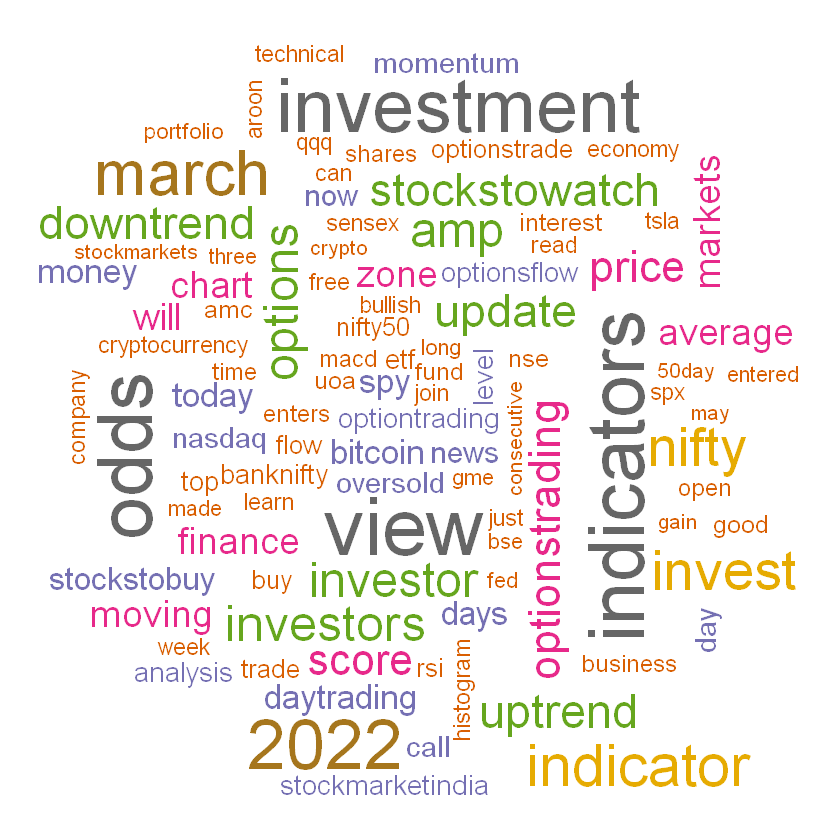

In [33]:
# Nova nuvem de palavras

wordcloud(names(tweets_frequencia), tweets_frequencia, min.freq = 2, max.word = 100, random.order = T, colors = formatacao)

### Clustering

<<DocumentTermMatrix (documents: 11961, terms: 8)>>
Non-/sparse entries: 11919/83769
Sparsity           : 88%
Maximal term length: 10
Weighting          : term frequency (tf)

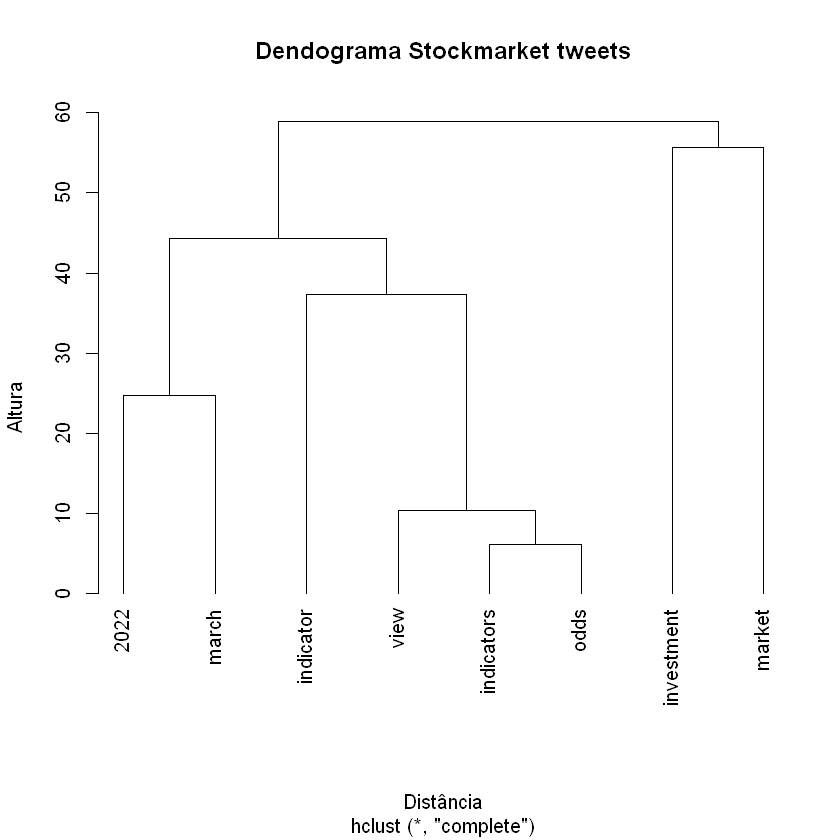

In [36]:
# Aplicando um pouco de machine learning - clustering

tweets_dtms2 <- removeSparseTerms(tweets_dtms, 0.90)
tweets_dtms2

# Clustering 1 - Dendograma
distancia <- dist(t(tweets_dtms2), method = "euclidian")
dendograma <- hclust(d = distancia, method = "complete")
plot(dendograma, hang = -1, main = "Dendograma Stockmarket tweets",
    xlab = "Distância",
    ylab = "Altura")

In [37]:
# Para ler melhor o dendograma

clusters <- 5

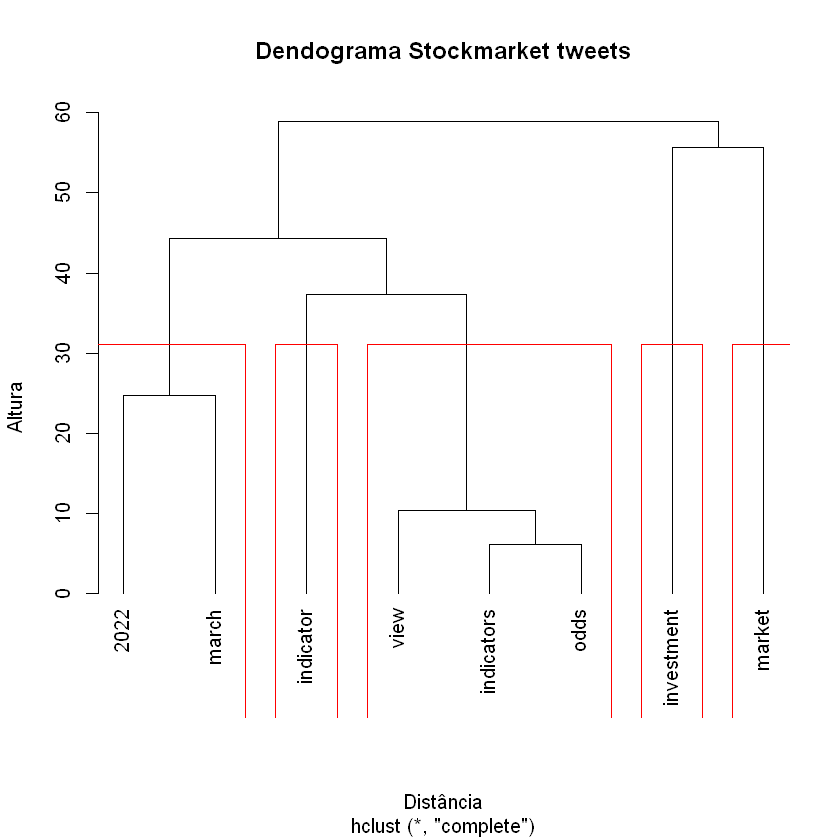

In [38]:
distancia <- dist(t(tweets_dtms2), method = "euclidian")
dendograma <- hclust(d = distancia, method = "complete")
plot(dendograma, hang = -1, main = "Dendograma Stockmarket tweets",
    xlab = "Distância",
    ylab = "Altura")
groups <- cutree(dendograma, k = clusters)
rect.hclust(dendograma, k = clusters, border = "red")

In [43]:
# Clustering 2 - K-means

kmeans_tweets <- kmeans(distancia, 3)

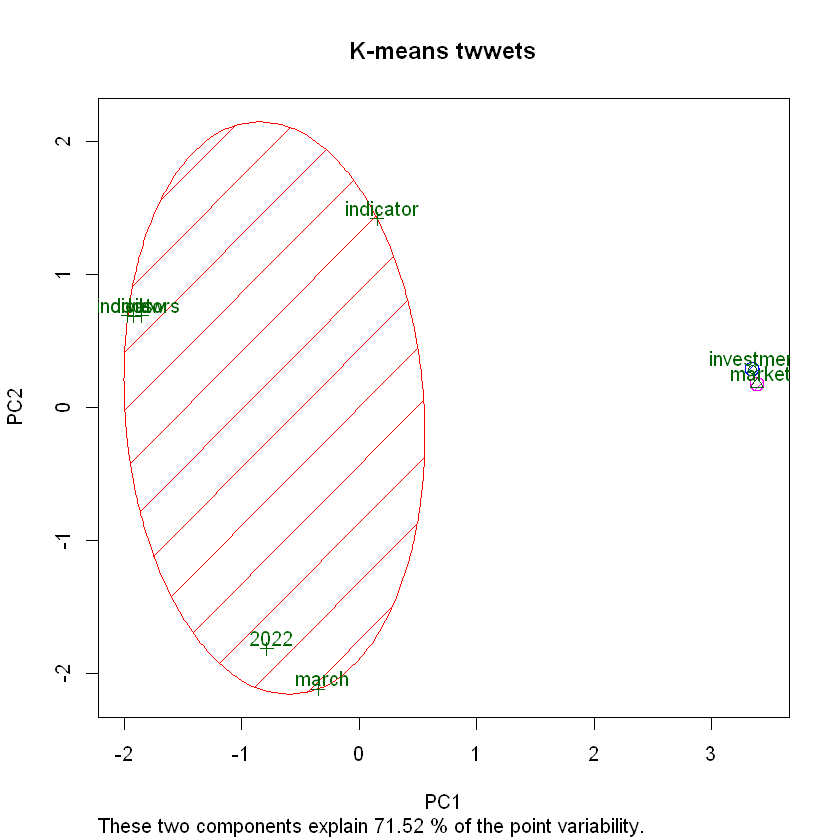

In [44]:
clusplot(as.matrix(distancia), kmeans_tweets$cluster, color = T, shade = T, labels = 3, lines = 0,
        main = "K-means twwets",
        xlab = "PC1",
        ylab = "PC2")